In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import RK45
import matplotlib.pyplot as plt

0.9999999767771897
2.9999994019445237
4.999989530390893
6.999883168882524
8.999060606903232


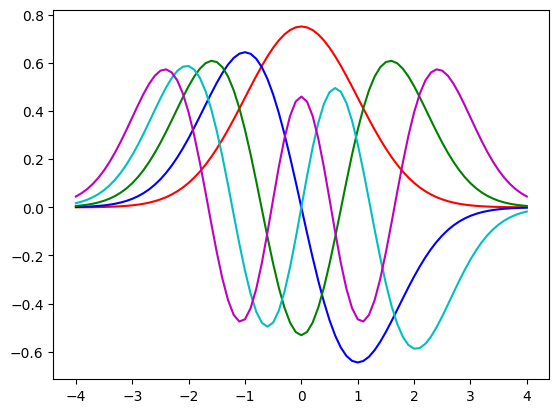

In [60]:
def shoot2(phi, x, eps):
    return [phi[1], (x ** 2 - eps) * phi[0]]

eigenfun = []; eigenval = []
tol = 1e-6
col = ['r', 'b', 'g', 'c', 'm', 'k']  # eigenfunc colors
xp = [-4, 4]
xshoot = np.linspace(xp[0], xp[1], 81)

eps_start = 0.1
for modes in range(1, 6):  # begin mode loop  # beginning value of beta
    eps = eps_start + 0.1 # initial value of eigenvalue beta
    deps = 0.2  # default step size in beta

    for _ in range(1000):  # begin convergence loop for beta
        y0 = [1, np.sqrt(16 - eps)]
        y = odeint(shoot2, y0, xshoot, args=(eps,))
       # y = RK45(shoot2, xp[0], x0, xp[1], args=(n0,beta))
        alpha = 16 - eps
        if abs(y[-1,1] + np.sqrt(alpha) * y[-1,0]) < tol:  # check for convergence
            print(eps)  # write out eigenvalue
            eigenval.append(eps)
            break  # get out of convergence loop

        if (-1) ** (modes + 1) * (y[-1,1] + np.sqrt(alpha) * y[-1,0]) > 0:
            eps += deps
        else:
            eps -= deps / 2
            deps /= 2

    eps_start = eps + 2  # after finding eigenvalue, pick new start
    norm = np.trapz(y[:, 0] ** 2, xshoot)  # calculate the normalization
    norm_phi = y[:, 0] / np.sqrt(norm)
    eigenfun.append(abs(norm_phi))
    plt.plot(xshoot, norm_phi, col[modes - 1])  # plot modes

plt.show()

In [61]:
A1 = np.array(eigenfun).T
A1

array([[2.56183470e-04, 1.45461736e-03, 5.66711043e-03, 1.74588473e-02,
        4.50516581e-02],
       [3.76940965e-04, 2.08377489e-03, 7.88695716e-03, 2.35399838e-02,
        5.86293690e-02],
       [5.51714864e-04, 2.96901781e-03, 1.09156754e-02, 3.15583001e-02,
        7.58483958e-02],
       [8.01216066e-04, 4.19588715e-03, 1.49786781e-02, 4.19281002e-02,
        9.71899061e-02],
       [1.15311660e-03, 5.87359613e-03, 2.03472413e-02, 5.51048286e-02,
        1.23080898e-01],
       [1.64382706e-03, 8.13893182e-03, 2.73391696e-02, 7.15653847e-02,
        1.53831231e-01],
       [2.32055909e-03, 1.11600069e-02, 3.63163648e-02, 9.17795041e-02,
        1.89559851e-01],
       [3.24364379e-03, 1.51394491e-02, 4.76780810e-02, 1.16171080e-01,
        2.30113234e-01],
       [4.48904553e-03, 2.03165046e-02, 6.18486348e-02, 1.45069151e-01,
        2.74981544e-01],
       [6.15097107e-03, 2.69674234e-02, 7.92584568e-02, 1.78649425e-01,
        3.23220532e-01],
       [8.34442598e-03, 3.5403

In [66]:
eigenvalue = np.array(eigenval)
A2 = eigenvalue
A2

array([0.99999998, 2.9999994 , 4.99998953, 6.99988317, 8.99906061])